<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/Machine_Learning_Algorithms_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Instructions

Part1: supervised learning

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters


Part2: unsupervised learning

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

"""

'\nInstructions\n\nPart1: supervised learning\n\nImport you data and perform basic data exploration phase\nDisplay general information about the dataset\nCreate a pandas profiling reports to gain insights into the dataset\nHandle Missing and corrupted values\nRemove duplicates, if they exist\nHandle outliers, if they exist\nEncode categorical features\nPrepare your dataset for the modelling phase\nApply Decision tree, and plot its ROC curve\nTry to improve your model performance by changing the model hyperparameters\n\n\nPart2: unsupervised learning\n\nDrop out the target variable\nApply K means clustering and plot the clusters\nFind the optimal K parameter\nInterpret the results\n\n'

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Microsoft_malware_dataset_min.csv")

# Display first few rows of the dataset
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [4]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e05f876ddf301316d04f0b7d7bdc9dae1968309fa329ebbe54d53b8938500979
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
# Pandas profiling report
from ydata_profiling import ProfileReport
# Generate the report
profile = ProfileReport(df, title="Microsoft Malware Profile Report")

# Display the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Check for missing values
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


In [7]:
# Total number of entries
total_entries = df.size

# Number of missing values
missing_values = df.isnull().sum().sum()

# Percentage of missing values
percentage_missing = (missing_values / total_entries) * 100

print(f"Percentage of missing values: {percentage_missing}%")

Percentage of missing values: 1.0999%


In [8]:
# Handle missing values (example: impute with median for numeric columns only)
for column in df.select_dtypes(include=['number']):
    df[column].fillna(df[column].median(), inplace=True)

<ipython-input-8-702e6e9fd048>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [9]:
# Check for duplicates
df.duplicated().sum()

83886

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

print("Number of duplicates after:", df.duplicated().sum())

Number of duplicates after: 0


In [11]:
# Encoding the categorical features using one hot encoding
data = pd.get_dummies(df, columns=['Census_OSEdition', 'OsPlatformSubRelease', ], drop_first=True)

data

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,...,Census_OSEdition_ServerStandard,Census_OSEdition_ServerStandardEval,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0.0,0.0,0,1.0,0.0,1.0,29,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.0,0.0,0,1.0,0.0,1.0,93,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0.0,0.0,0,1.0,0.0,1.0,86,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0.0,0.0,0,1.0,0.0,1.0,88,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0.0,0.0,0,1.0,0.0,1.0,18,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99899,0,0.0,0.0,0,1.0,0.0,1.0,121,False,False,...,False,False,False,False,False,False,False,True,False,False
99926,0,1.0,0.0,0,1.0,0.0,0.0,115,False,False,...,False,False,False,False,False,True,False,False,False,False
99927,0,1.0,0.0,1,1.0,0.0,1.0,142,True,False,...,False,False,False,False,False,True,False,False,False,False
99943,0,1.0,0.0,1,1.0,0.0,1.0,214,True,False,...,False,False,False,False,False,True,False,False,False,False


In [12]:
# Separate features (X) and target variable (y)
X = data.drop(['CountryIdentifier', 'HasDetections'] ,axis=1)
y = data['HasDetections']

In [13]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [14]:
# Import DecisionTreeClassifier and roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Predict probabilities for ROC curve
y_proba = dt_classifier.predict_proba(X_test)[:, 1]

In [16]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

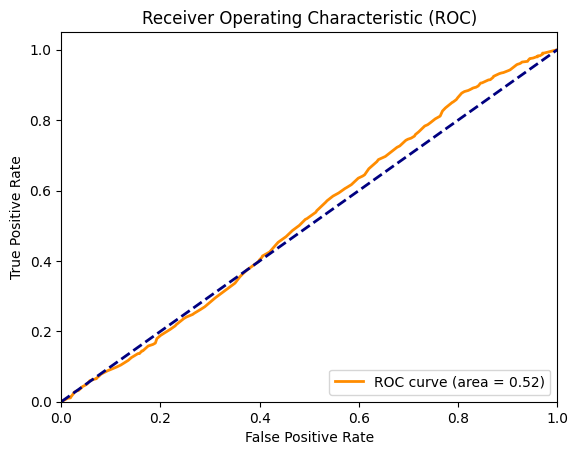

In [17]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [18]:
roc_auc

0.518126336473444

HYPERPARAMETER TUNING USING GRIDSEARCH

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [22]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [23]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC with best model:", roc_auc)

ROC AUC with best model: 0.5519672889094377


#Unsupervised Learning

In [24]:
# Drop the target variable from the dataset
data = df
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99899,0,0.0,0.0,Professional,0,1.0,0.0,1.0,th2,121
99926,0,1.0,0.0,Professional,0,1.0,0.0,0.0,rs4,115
99927,0,1.0,0.0,Core,1,1.0,0.0,1.0,rs4,142
99943,0,1.0,0.0,Core,1,1.0,0.0,1.0,rs4,214


In [25]:
X_unsupervised = data.drop(['CountryIdentifier', 'HasDetections','Census_OSEdition', 'OsPlatformSubRelease'], axis=1)
X_unsupervised

,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected
0,0.0,0.0,0,1.0,0.0,1.0
1,0.0,0.0,0,1.0,0.0,1.0
2,0.0,0.0,0,1.0,0.0,1.0
3,0.0,0.0,0,1.0,0.0,1.0
4,0.0,0.0,0,1.0,0.0,1.0
...,...,...,...,...,...,...
99899,0.0,0.0,0,1.0,0.0,1.0
99926,1.0,0.0,0,1.0,0.0,0.0
99927,1.0,0.0,1,1.0,0.0,1.0
99943,1.0,0.0,1,1.0,0.0,1.0


In [26]:
X_unsupervised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16114 entries, 0 to 99962
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Wdft_IsGamer                16114 non-null  float64
 1   Census_IsVirtualDevice      16114 non-null  float64
 2   Census_HasOpticalDiskDrive  16114 non-null  int64  
 3   Firewall                    16114 non-null  float64
 4   SMode                       16114 non-null  float64
 5   IsProtected                 16114 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 881.2 KB


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

In [28]:
# Import KMeans and matplotlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize KMeans with an assumed number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_unsupervised)

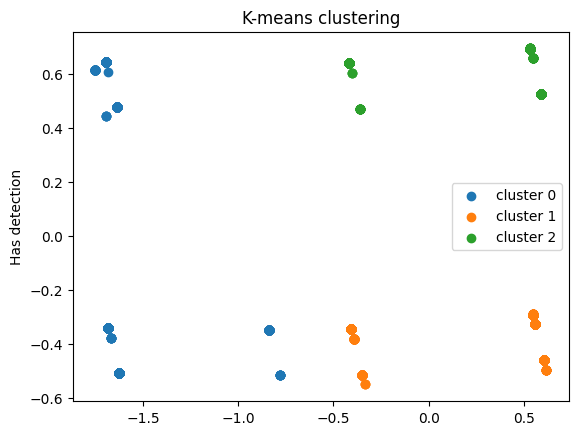

In [29]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X_unsupervised['cluster']= clusters

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot the results
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure()
for cluster in range(3):
    plt.scatter(X_pca[clusters ==cluster, 0], X_pca[clusters ==cluster, 1], label= f'cluster {cluster}') # Indentation fixed here
plt.ylabel('Has detection') # Indentation fixed here
plt.title('K-means clustering')
plt.legend()
plt.show()

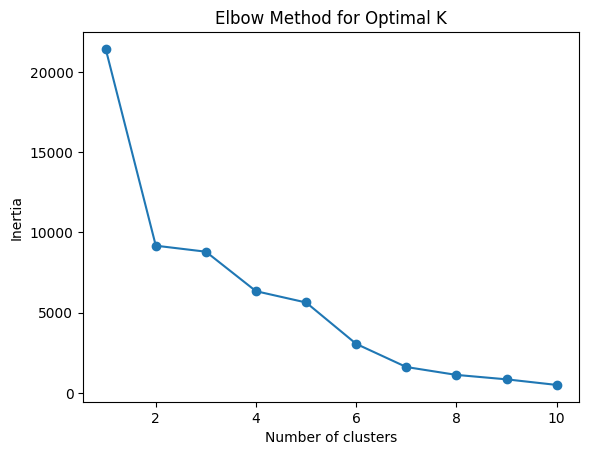

In [30]:
# Use the elbow method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state= 0)
    kmeans.fit(X_unsupervised)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [31]:
# Import silhouette_score
from sklearn.metrics import silhouette_score

# Calculate silhouette score using cluster assignments from KMeans
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.7888140540336847
